In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Define the date range
start_date = "2024-07-01 23:00"
end_date = "2024-08-20 23:00"


In [6]:
# Load original data
original_data = pd.read_excel("../DATAFORMODELtrain200824.xlsx")

# Convert 'Date' column to datetime format
original_data['Date'] = pd.to_datetime(original_data['Date'], errors='coerce')

In [7]:
# Filter original data for the specified date range
original_data_filtered = original_data[(original_data['Date'] >= start_date) & (original_data['Date'] <= end_date)]

# Load forecasted results
forecasted_data = pd.read_csv("forecast_results.csv")

# Convert 'ds' (Date) column to datetime format
forecasted_data['ds'] = pd.to_datetime(forecasted_data['ds'], errors='coerce')

# Filter forecasted data for the specified date range
forecasted_data_filtered = forecasted_data[(forecasted_data['ds'] >= start_date) & (forecasted_data['ds'] <= end_date)]


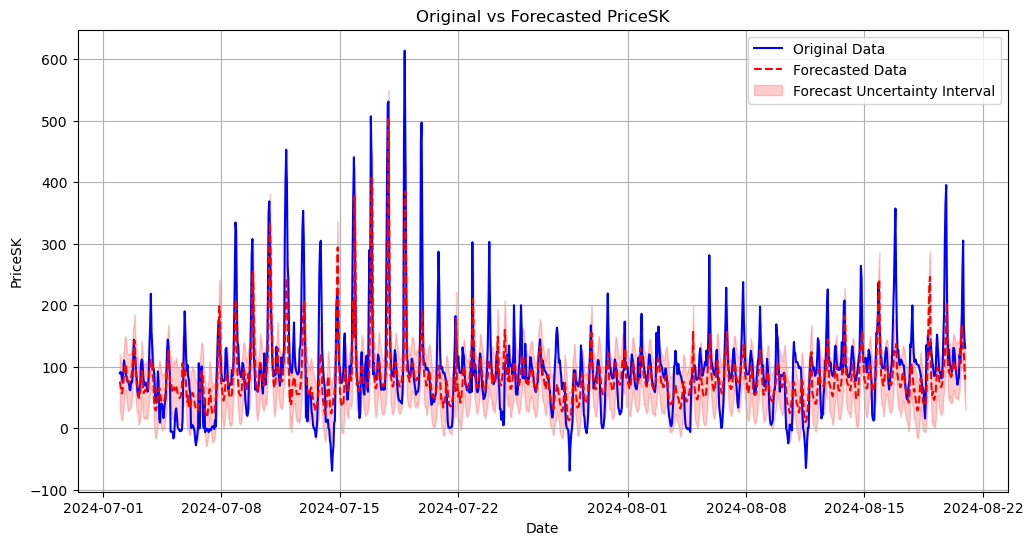

In [8]:
# Plot the original and forecasted results
plt.figure(figsize=(12, 6))
plt.plot(original_data_filtered['Date'], original_data_filtered['PriceSK'], label='Original Data', color='blue')
plt.plot(forecasted_data_filtered['ds'], forecasted_data_filtered['yhat'], label='Forecasted Data', color='red', linestyle='--')

# Plot additional forecast uncertainty intervals if needed
plt.fill_between(forecasted_data_filtered['ds'], 
                 forecasted_data_filtered['yhat_lower'], 
                 forecasted_data_filtered['yhat_upper'], 
                 color='red', alpha=0.2, label='Forecast Uncertainty Interval')

plt.xlabel('Date')
plt.ylabel('PriceSK')
plt.title('Original vs Forecasted PriceSK')
plt.legend()
plt.grid(True)
plt.show()